# Librerías

In [1]:
import pandas as pd

# Importación datos

In [5]:
df_whats = pd.read_csv('../Data/Chat de WhatsApp.txt', sep='delimiter', header=None, encoding = 'latin1', engine = 'python')

In [7]:
df_whats.head(10)

,0
0,8/3/19 13:11 - Los mensajes en este grupo ahor...
1,"8/3/19 13:04 - âJy creÃ³ el grupo ""Bendita e..."
2,8/3/19 13:11 - âJy te aÃ±adiÃ³
3,8/3/19 13:14 - JebÃºs ð´ââ : XD
4,8/3/19 13:15 - Jn: Quien es Kike y quien ea Lalo?
5,8/3/19 13:15 - Jn: ð¤
6,8/3/19 13:16 - +52 1 55 2563 8294: <Multimedia...
7,8/3/19 13:17 - Jn: Va jeje
8,8/3/19 13:25 - Jy: Naaa mms Jonathan
9,8/3/19 13:25 - Jy: Jajajaja


In [8]:
df_whats.shape

(2475, 1)

# Tratamiento datos

In [52]:
date = []
time = []
persons = []
messages = []
errors = []
for row in range(len(df_whats)):
    whats = df_whats.iloc[row][0].split(' - ')
    try:
        messages.append(whats[1].split(':')[1])
        date.append(whats[0].split()[0])
        time.append(whats[0].split()[1])
        persons.append(whats[1].split(':')[0])      
    except:
        errors.append(row)

In [58]:
len(errors)

20

In [62]:
df_whats.iloc[errors]

,0
0,8/3/19 13:11 - Los mensajes en este grupo ahor...
1,"8/3/19 13:04 - âJy creÃ³ el grupo ""Bendita e..."
2,8/3/19 13:11 - âJy te aÃ±adiÃ³
19,11/3/19 17:39 - âJy cambiÃ³ el Ã­cono de est...
20,"11/3/19 17:26 - âJy cambiÃ³ el asunto de ""Be..."
179,27/3/19 13:45 - âCr aÃ±adiÃ³ a Ro
181,El viernes si haremos algo para despedir a @52...
245,Atte.
246,Enrique Navarrete
253,Sabes que cuentas con nuestro apoyo âº


In [54]:
dict_data = {'fecha':date, 'hora':time, 'persona':persons, 'mensaje':messages}

In [59]:
df = pd.DataFrame(dict_data)

In [61]:
df.head()

,fecha,hora,persona,mensaje
0,8/3/19,13:14,JebÃºs ð´ââ,XD
1,8/3/19,13:15,Jn,Quien es Kike y quien ea Lalo?
2,8/3/19,13:15,Jn,ð¤
3,8/3/19,13:16,+52 1 55 2563 8294,<Multimedia omitido>
4,8/3/19,13:17,Jn,Va jeje


In [60]:
df.shape

(2455, 4)

# Análisis

## Quiénes:

In [64]:
df['persona'].nunique()

10

In [65]:
df['persona'].unique().tolist()

['JebÃºs ð\x9f\x8f´â\x80\x8dâ\x98\xa0',
 'Jn',
 '+52 1 55 2563 8294',
 'Jy',
 'Lo',
 'Cr',
 'Ro',
 'Ae',
 'Id',
 'In']

## Quiénes manda más whats:

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
#### import matplotlib.cuffliks

In [66]:
df['persona'].value_counts()

Jy                    666
Lo                    569
Jn                    401
Cr                    334
Ae                    190
JebÃºs ð´ââ       95
Id                     81
Ro                     77
+52 1 55 2563 8294     28
In                     14
Name: persona, dtype: int64

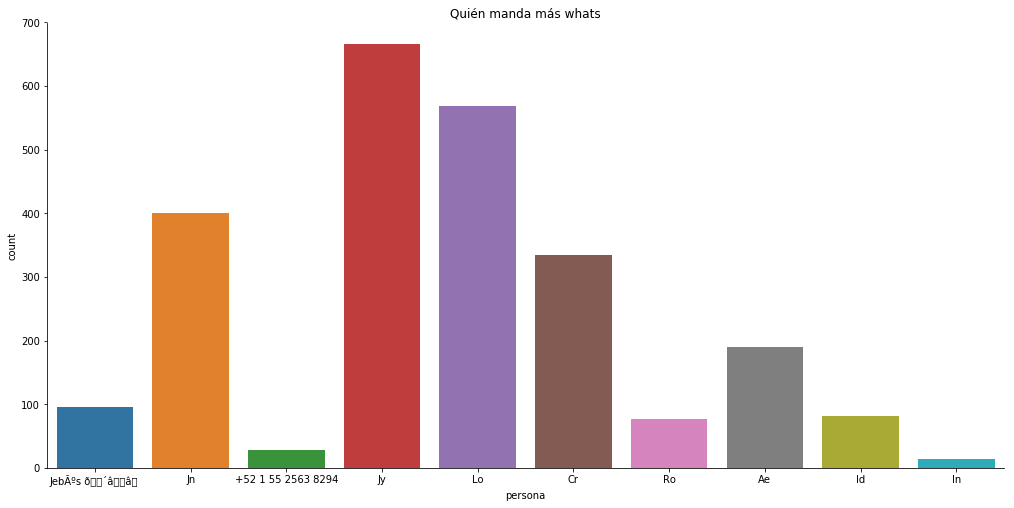

In [80]:
sns.catplot(x = 'persona', kind='count', data=df, aspect=2, height=7)
plt.title('Quién manda más whats')
plt.show()

## ¿Quién es el más memero?

In [75]:
df['persona'][df['mensaje'] == ' <Multimedia omitido>'].value_counts()

Jy                    181
Lo                     88
Ae                     48
Jn                     25
Id                     24
JebÃºs ð´ââ       19
Ro                     13
In                      9
Cr                      6
+52 1 55 2563 8294      4
Name: persona, dtype: int64

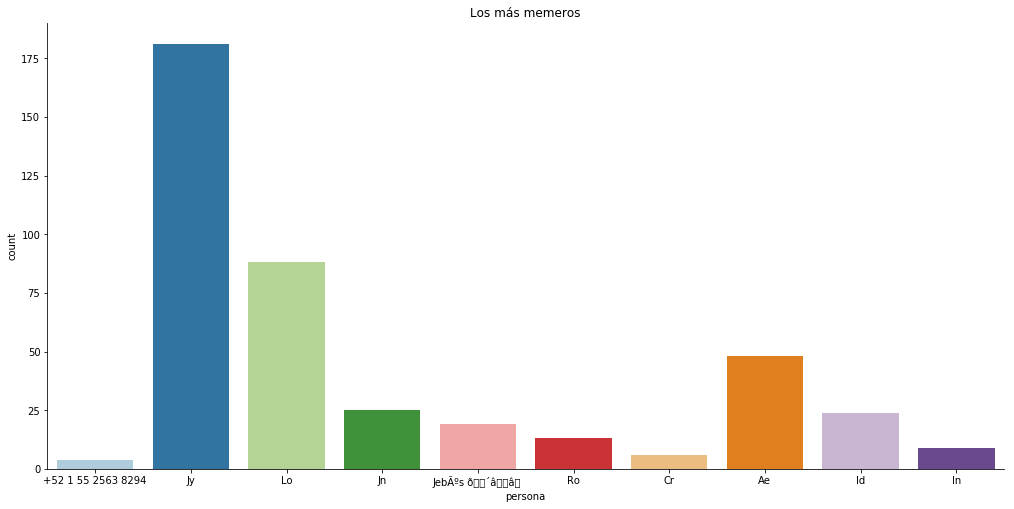

In [82]:
sns.catplot(x = 'persona', kind='count', data=df[df['mensaje'] == ' <Multimedia omitido>'], aspect=2, height=7, palette='Paired')
plt.title('Los más memeros')
plt.show()

## Los menos memeros

In [83]:
df['persona'][df['mensaje'] != ' <Multimedia omitido>'].value_counts()

Jy                    485
Lo                    481
Jn                    376
Cr                    328
Ae                    142
JebÃºs ð´ââ       76
Ro                     64
Id                     57
+52 1 55 2563 8294     24
In                      5
Name: persona, dtype: int64

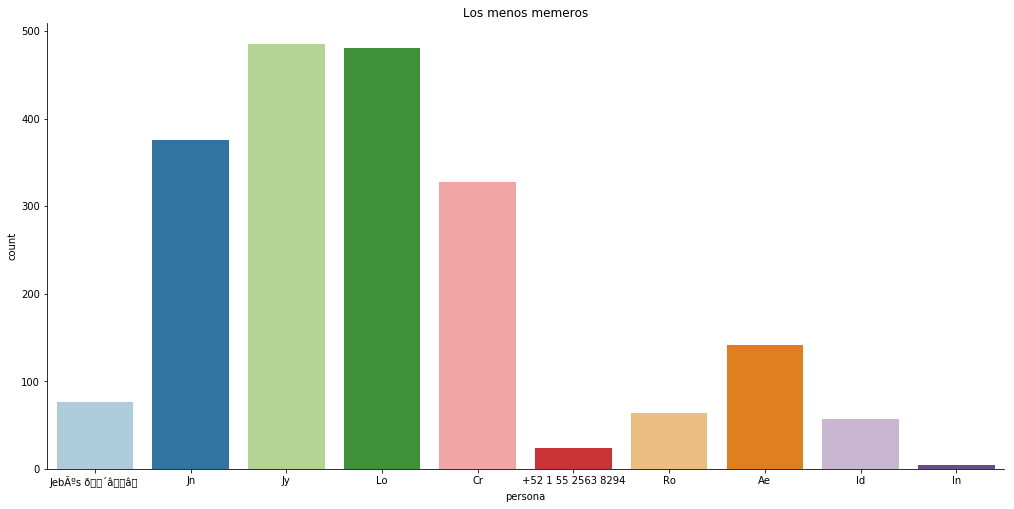

In [85]:
sns.catplot(x = 'persona', kind='count', data=df[df['mensaje'] != ' <Multimedia omitido>'], aspect=2, height=7, palette='Paired')
plt.title('Los menos memeros')
plt.show()

## A qué hora se escribe más:

In [88]:
df['hora'].apply(lambda x: x[:2]).value_counts()

17    431
13    395
12    272
08    204
14    140
15    117
18    116
16    107
07    102
09     95
10     82
19     76
21     72
23     60
11     55
06     40
00     36
22     27
20     26
03      2
Name: hora, dtype: int64

## Quién escribe más

In [118]:
total_palabras = {}
corpus = {}
for individuo in df['persona'].unique().tolist():
    data = df[(df['persona'] == individuo) & (df['mensaje'] != ' <Multimedia omitido>')].copy()
    data.reset_index(drop=True, inplace=True)
    total_messag = ' '
    for row in range(len(data)):
        total_messag += data['mensaje'].loc[row]
    corpus[individuo] = total_messag.split()
    total_palabras[individuo] = len(total_messag.split())

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [122]:
for individuo in corpus.keys():
    vec = CountVectorizer().fit(corpus[individuo])
    bag_of_words = vec.transform(corpus[individuo])
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    print(individuo, '\n', words_freq[:30], '\n\n')

JebÃºs ð´ââ  
 [('ya', 11), ('que', 9), ('el', 8), ('de', 7), ('estã', 6), ('en', 6), ('¼ð', 6), ('se', 6), ('xd', 5), ('vamos', 5), ('la', 5), ('va', 5), ('metro', 5), ('no', 5), ('es', 4), ('mã', 4), ('las', 3), ('ir', 3), ('por', 3), ('todo', 3), ('una', 3), ('los', 3), ('amigos', 3), ('lo', 3), ('20', 2), ('bien', 2), ('yo', 2), ('amos', 2), ('como', 2), ('maã', 2)] 


Jn 
 [('que', 60), ('no', 50), ('ya', 45), ('jejeje', 30), ('de', 28), ('jeje', 24), ('si', 24), ('va', 23), ('el', 23), ('se', 22), ('la', 20), ('amigos', 17), ('las', 14), ('pos', 14), ('en', 14), ('ma', 14), ('hora', 13), ('es', 12), ('yo', 12), ('los', 11), ('jejejeje', 10), ('vamos', 10), ('como', 10), ('lo', 10), ('por', 9), ('nos', 9), ('pero', 8), ('tons', 8), ('eso', 8), ('lalo', 7)] 


+52 1 55 2563 8294 
 [('que', 12), ('siempre', 5), ('de', 4), ('en', 3), ('me', 3), ('no', 3), ('les', 3), ('la', 3), ('los', 3), ('el', 3), ('se', 3), ('sã', 2), ('nos', 2), ('apenas', 2), ('drogo', 2), ('espero', 2), (